# Dot Plot visualization using Plotly

In [12]:
from ga import GA_MSA
from utils import Utils
from Bio.pairwise2 import align, format_alignment

In [4]:
seq1 = "CARTABLANCHE"
seq2 = "CARTE"

In [5]:
seq = [seq1, seq2, seq1]
seq = ["ACTGCAACG", "ATCTGCTAG", "ACCCGAGACTG", "CGTAAACGT"]

In [6]:
GA_MSA.compute_pairwise_alignments(seq)

array([['ACTGCAACG', 'A-CTGCAACG', 'ACTGC-A-AC-G', 'ACTG-CAACG-'],
       ['ATCTGCTA-G', 'ATCTGCTAG', 'ATCTG---CTAG', 'ATCTGCTA---G-'],
       ['ACC-CGAGACTG', 'ACCCGAGACT-G', 'ACCCGAGACTG', 'ACCCG-AGACTG-'],
       ['-C-GTAAACGT', '--C-G-TAAACGT', '---CGTAAAC-GT', 'CGTAAACGT']],
      dtype=object)

In [81]:
for a in align.globalxx("ACCGT", "CGATT"):
    f = format_alignment(*a)

In [82]:
f = f.split('\n')

In [83]:
first_alignment = list(f[0])
second_alignment = list(f[2])
matches = list(f[1])
score = f[3].split('=')[-1]

In [84]:
list(first_alignment)

['A', 'C', 'C', 'G', '-', '-', 'T']

In [85]:
first = [x+str(i) for i,x in enumerate(first_alignment)]
sec = [x+str(i) for i,x in enumerate(second_alignment)]

In [86]:
matches

[' ', '|', ' ', '|', ' ', ' ', '|']

In [156]:
[f.find(c) for c in s]

[0, -1, 2, 3, -1, 7, 0, -1, -1, -1]

In [233]:
f = "THISISKOOL"
s = "ITISNOTGOO"

fl = list(f)
sl = list(s)
fl.insert(0, '-')

fle = [x+str(i) for i,x in enumerate(first)]
sle = [x+str(i) for i,x in enumerate(sec)]

matches = [f.find(c) for c in s]
fl

['-', 'T', 'H', 'I', 'S', 'I', 'S', 'K', 'O', 'O', 'L']

In [234]:
matches

[2, 0, 2, 3, -1, 7, 0, -1, 7, 7]

In [236]:
import plotly.express as px
import pandas as pd


df = pd.DataFrame(dict(first_alignment=fl[1:], second_alignment=sl, matches=matches))

# Use column names of df for the different parameters x, y, color, ...
fig = px.scatter(df, x="matches", y="second_alignment",
                 title="Dot plot of sequence alignment",
                 labels={"first_alignment":"First Sequence ", "second_alignment": "Second Sequence "} # customize axis label
                )

# fig.update_layout(xaxis_type='category')

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(range(-1, len(fl))),
        ticktext = fl
    )
)
fig.update_xaxes(showspikes=True, side="top")
fig.update_yaxes(showspikes=True, autorange="reversed")
fig.update_layout(hovermode="x")


fig.show()

In [294]:
def findOccurrences(s, ch):
    return [i for i, letter in enumerate(s) if letter == ch]

In [351]:
a = "ACCTGAGCTCACCTGAGTT"
b = "ACCTGAGCTCACCTGAGTT"

a = "ThisisashorttextNoCopy"
b = "ThisisalongtextCopyNot"

al = list(a)
bl = list(b)


ale = [c+str(i) for i,c in enumerate(al)]
ble = [c+str(i) for i,c in enumerate(bl)]

matches = [findOccurrences(b, c) for c in a]
# matches

In [352]:
match_lists = list()
for i in range(len(max(matches, key=len))):
    c_list = list()
    for l in matches:
#         print(i)
#         print(len(l))
        if len(l) > i:
            c_list.append(l[i])
        else:
            c_list.append(None)
#         print(c_list)
    match_lists.append(c_list)
# match_lists

In [355]:
import plotly.graph_objects as go

fig = go.Figure()

for l in match_lists:
    fig.add_trace(go.Scatter(
        x=l,
        y=list(range(len(al))),
        name='Match',
        marker=dict(
            color='rgba(156, 165, 196, 0.95)',
            line_color='rgba(156, 165, 196, 1.0)',
        )
    ))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=8))

fig.update_layout(
    title="Sequence Similarity",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
        tickmode = 'array',
        tickvals = list(range(len(bl))),
        ticktext = bl
    ),
    yaxis=dict(
        tickmode = 'array',
        tickvals = list(range(len(al))),
        ticktext = al
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.update_layout(showlegend=False)
fig.update_xaxes(showspikes=True, side="top")
fig.update_yaxes(showspikes=True, autorange="reversed")
fig.show()

In [268]:
def delta(x,y):
    return 1 if x == y else 0

In [269]:
def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

In [270]:
def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

In [271]:
def plotMatrix(M,t, seq1, seq2, nonblank = 'O', blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)

In [289]:
def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2)
    return M

In [290]:
seqx = "ACCTGAGCTCACCTGAGTTAACCTGAGCTCACCTGAGTTAACCTGAGCTCACCTGAGTTA"
seqy = "ACCTGAGCTCACCTGAGTTAACCTGAGCTCACCTGAGTTAACCTGAGCTCACCTGAGTTA"
dotplot(seqx,seqy)

 |ACCTGAGCTCACCTGAGTTAACCTGAGCTCACCTGAGTTAACCTGAGCTCACCTGAGTTA
--------------------------------------------------------------
A| OOOO OOOO OOOO OOO  OOOO OOOO OOOO OOO  OOOO OOOO OOOO OOO 
C|O  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOO
C|O  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOO
T|OOO OOOO OOOO OOO  OOOO OOOO OOOO OOO  OOOO OOOO OOOO OOO  O
G|OOOO O OOOOOOO O OOOOOOO O OOOOOOO O OOOOOOO O OOOOOOO O OOO
A| OOOO OOOO OOOO OOO  OOOO OOOO OOOO OOO  OOOO OOOO OOOO OOO 
G|OOOO O OOOOOOO O OOOOOOO O OOOOOOO O OOOOOOO O OOOOOOO O OOO
C|O  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOO
T|OOO OOOO OOOO OOO  OOOO OOOO OOOO OOO  OOOO OOOO OOOO OOO  O
C|O  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOO
A| OOOO OOOO OOOO OOO  OOOO OOOO OOOO OOO  OOOO OOOO OOOO OOO 
C|O  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOO
C|O  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOOO  OOOO O O  OOOOOOO
T|OOO OOOO OOOO OOO  OOOO OOOO OOOO OOO  OOOO OOOO OOOO

[[1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1],
 [0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  

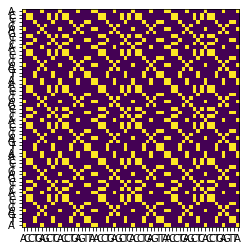

In [291]:
import numpy
import matplotlib.pyplot as plt
dotplot=plt.imshow(numpy.array(makeMatrix(seqx,seqy,1)))
xt=plt.xticks(numpy.arange(len(list(seqx))),list(seqx))
yt=plt.yticks(numpy.arange(len(list(seqx))),list(seqx))
plt.show()

In [281]:
import plotly.express as px

df = pd.DataFrame(dotplot(seqx, seqy))
df.columns = list(seqx)
df.index = list(seqy)

fig = px.(df)
fig.show()
df

 |ACCTGAGCTCACCTGAGTTA
----------------------
A| OOOO OOOO OOOO OOO 
C|O  OOOO O O  OOOOOOO
C|O  OOOO O O  OOOOOOO
T|OOO OOOO OOOO OOO  O
G|OOOO O OOOOOOO O OOO
A| OOOO OOOO OOOO OOO 
G|OOOO O OOOOOOO O OOO
C|O  OOOO O O  OOOOOOO
T|OOO OOOO OOOO OOO  O
C|O  OOOO O O  OOOOOOO
A| OOOO OOOO OOOO OOO 
C|O  OOOO O O  OOOOOOO
C|O  OOOO O O  OOOOOOO
T|OOO OOOO OOOO OOO  O
G|OOOO O OOOOOOO O OOO
A| OOOO OOOO OOOO OOO 
G|OOOO O OOOOOOO O OOO
T|OOO OOOO OOOO OOO  O
T|OOO OOOO OOOO OOO  O
A| OOOO OOOO OOOO OOO 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
6,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
7,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
9,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0


In [282]:
df.columns

RangeIndex(start=0, stop=20, step=1)

In [283]:
df.columns = list(seqx)

In [284]:
df.index = list(seqy)

In [285]:
df

,A,C,C,T,G,A,G,C,T,C,A,C,C,T,G,A,G,T,T,A
A,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
C,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0
C,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0
T,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
G,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
A,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
G,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
C,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0
T,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
C,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0


In [293]:
import plotly.graph_objects as go

country = al
voting_pop = [40, 45.7, 52, 53.6, 54.1, 54.2, 54.5, 54.7, 55.1, 56.6]
reg_voters = [49.1, 42, 52.7, 84.3, 51.7, 61.1, 55.3, 64.2, 91.1, 58.9]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=voting_pop,
    y=country,
    name='Percent of estimated voting age population',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line_color='rgba(156, 165, 196, 1.0)',
    )
))
fig.add_trace(go.Scatter(
    x=reg_voters, y=country,
    name='Percent of estimated registered voters',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line_color='rgba(217, 217, 217, 1.0)'
    )
))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=16))

fig.update_layout(
    title="Votes cast for ten lowest voting age population in OECD countries",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()